## **1. Blurring the background**

The following is done using an instance segmentation model (DeepLabV3). The DeepLabV3 architecture has *Resnet-101* as its architecture and is pretrained on the *image-net* dataset. The model returns the instance segmentation of the image. The image is then binarized keeping only the person class and the background is blurred using the mask obtained.

In [1]:
import cv2
from utils import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
from PIL import *


Enter path of the image:  tests/sitting.jpeg


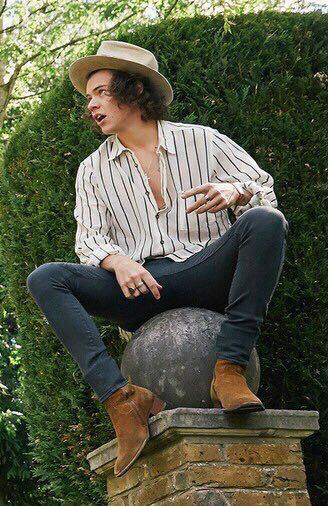

In [2]:
IMG_PATH = input('Enter path of the image: ')
img = cv2.imread(IMG_PATH)
Image.open(IMG_PATH)

Using device: cpu


Using cache found in /home/dwayne99/.cache/torch/hub/pytorch_vision_v0.6.0


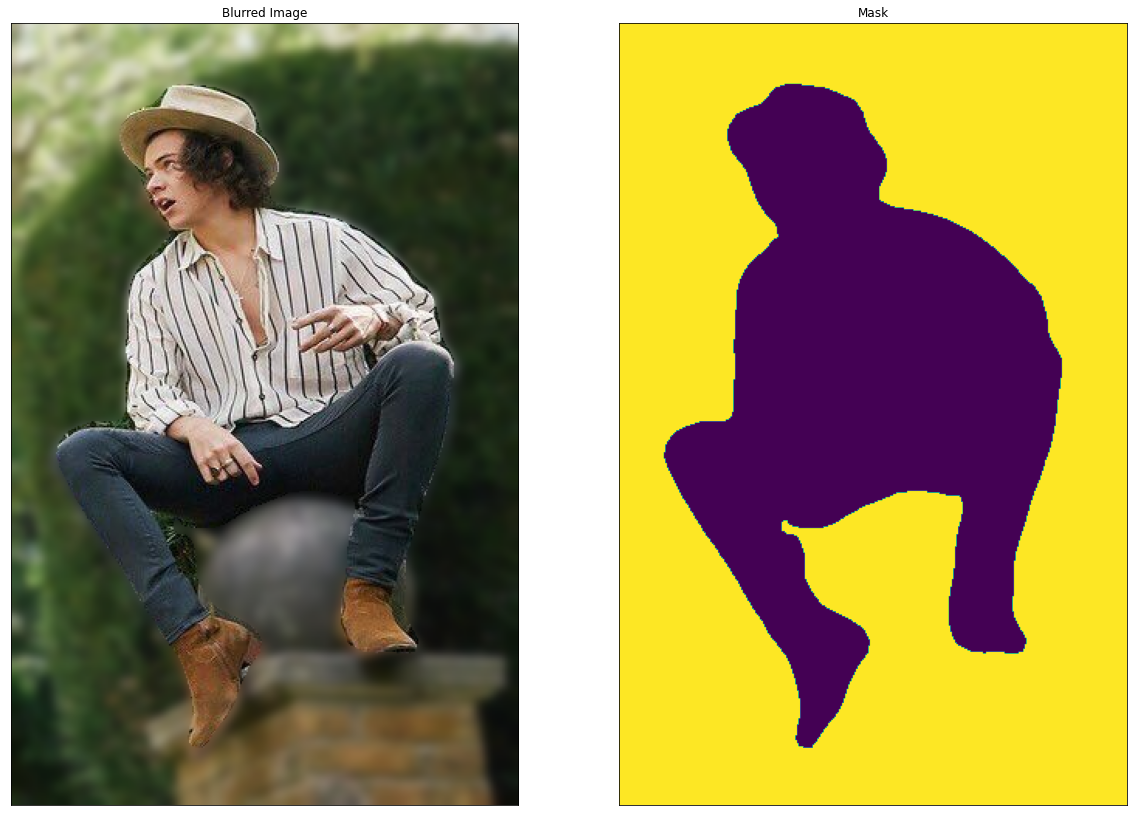

In [3]:
model = load_model()
seg = get_pred(img,model)
blur,mask = blur_background(img,seg)
mask = cv2.cvtColor(np.uint8(mask)*255,cv2.COLOR_BGR2GRAY)
plot_blur_mask(blur,mask)

## **2. Focus using Distance Transform**

In [6]:
# save the mask for future use
# save to npy file
np.save('harry1_mask.npy', mask)

In [6]:
import cv2
import numpy as np
import os

def focus_with_distance(img, bw, name):
    try:
        os.mkdir('output3/'+name)
    except:
        pass
    cv2.imwrite("output3/"+name+"/focus3_before.jpeg",img)
    cv2.imwrite("output3/"+name+"/focus3_binary_map.jpeg",bw)
    dist = cv2.distanceTransform(bw, cv2.DIST_L2, 5)
    # Normalize the distance image for range = {0.0, 1.0}
    # so we can visualize and threshold it
    cv2.normalize(dist, dist, 0, 1, cv2.NORM_MINMAX)
    dist[dist < 0.01] =  0.005
    dist[(dist < 0.9) & (dist > 0.95) ] =  0.9
    dist[(dist < 1) & (dist > 0.95) ] =  0.95
    dist = -np.log(dist)
    cv2.normalize(dist, dist, 0, 1, cv2.NORM_MINMAX)
    cv2.imwrite("output3/"+name+"/focus3_distance.jpeg",dist*255)
    # applying the layers
    original_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(original_img)
    lim = 0
    #s[binary_mapping_img == 0] = 30
#     print("shapes of dist and s", dist.shape, s.shape)
    #s_new = cv2.multiply(s,1-dist, cv2.CV_8U)
    s_new = np.uint8(np.multiply(s, dist))
    v_new = np.uint8(np.multiply(v, dist))
    original_img = cv2.merge((h, s_new, v_new))
    original_img = cv2.cvtColor(original_img, cv2.COLOR_HSV2BGR)
    cv2.imwrite("output3/"+name+"/focus3.jpeg",original_img)
    
    return dist, original_img

In [7]:
# load the image
# img = cv2.imread('temp/harry1.jpeg')
# load the mask
# mask = np.load('harry1_mask.npy')
dist, focus_img = focus_with_distance(img,mask,'sitting')

**Plotting the results obtained from the above cell**

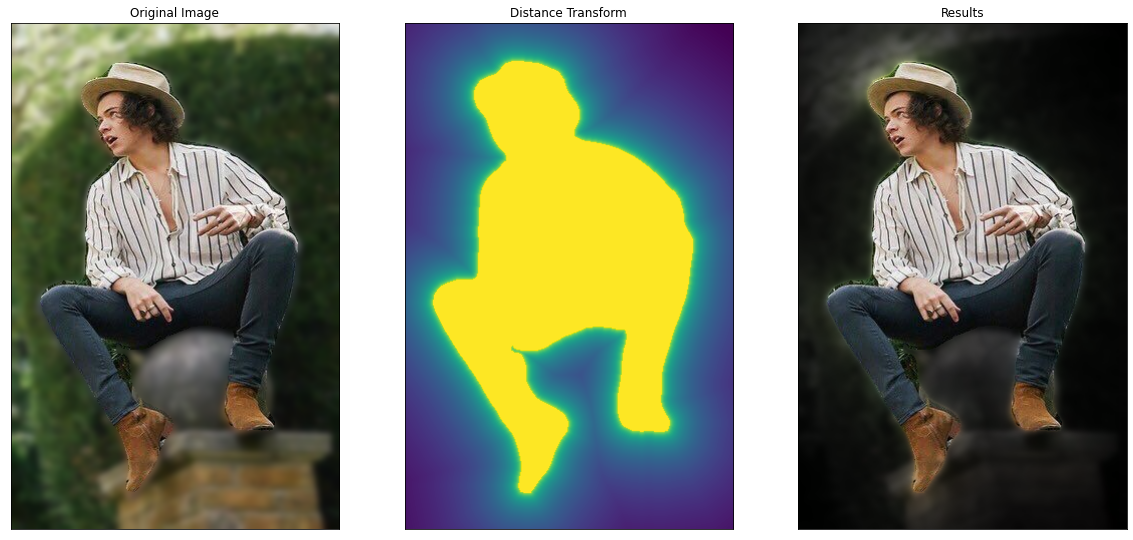

In [8]:
# subplot for original img
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.xticks([]);plt.yticks([])
plt.title('Original Image')

# sublot for distance transform
plt.subplot(1, 3, 2)
plt.imshow(dist)
plt.xticks([]);plt.yticks([])
plt.title('Distance Transform')

# sublot for final results
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(focus_img,cv2.COLOR_BGR2RGB))
plt.xticks([]);plt.yticks([])
plt.title('Results')

plt.show()

## **3. Clothing Detection**

In [9]:
from app import *

single_image_process()

img path:  output3/sitting/focus3.jpeg
Enter the path to the directory to save the file:  temp


Using device: cpu


Using cache found in /home/dwayne99/.cache/torch/hub/pytorch_vision_v0.6.0


Saved successfully at temp


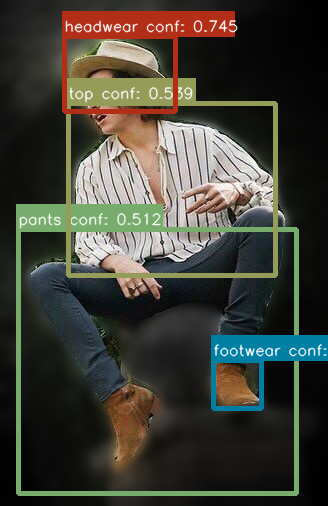

In [11]:
from PIL import *
Image.open('temp/focus3.png')

In [4]:
from utils import *

focus = focus_with_distance(img,mask)

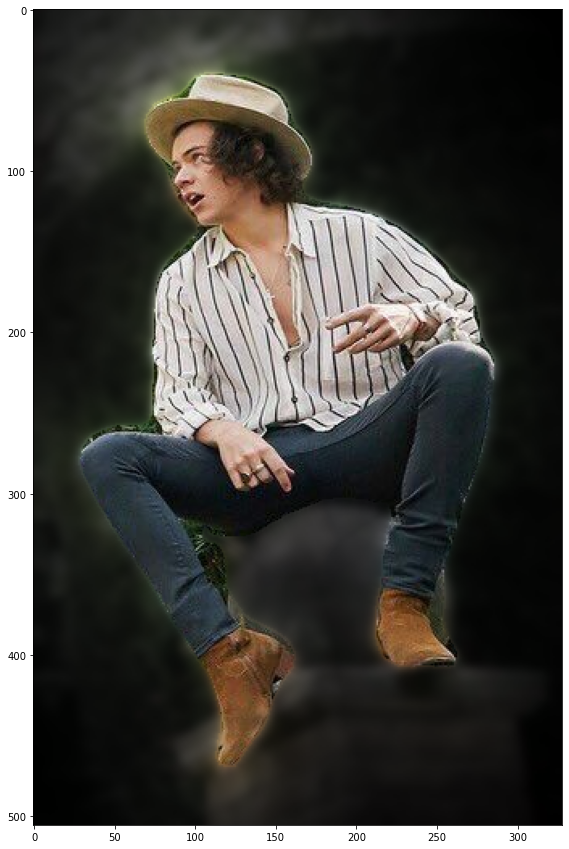

In [5]:
plt.imshow(cv2.cvtColor(focus,cv2.COLOR_BGR2RGB))